<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,36.992101,48.541691,-88.183270,7.350522,101.697483,-94.346961
1,0.0,1.0,21.741184,68.629663,102.474625,202.845472,99.528024,103.317447
2,0.0,2.0,73.865186,50.924671,49.007466,183.797323,108.662780,75.134543
3,0.0,3.0,24.162855,80.524474,212.838728,327.526057,100.381752,227.144304
4,0.0,4.0,76.821445,97.695646,-245.371049,-60.853958,110.793718,-171.647675
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,40.953073,84.436243,-80.276713,55.112603,68.571269,-13.458666
29996,999.0,26.0,65.663057,65.510956,-74.834107,66.339906,160.426010,-94.086104
29997,999.0,27.0,27.361805,34.195506,-54.936812,16.620499,76.429504,-59.809005
29998,999.0,28.0,73.797444,53.332605,139.641247,276.771295,196.389790,80.381506


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    36.992101  48.541691  -88.183270    7.350522  101.697483   
      1.0    21.741184  68.629663  102.474625  202.845472   99.528024   
      2.0    73.865186  50.924671   49.007466  183.797323  108.662780   
      3.0    24.162855  80.524474  212.838728  327.526057  100.381752   
      4.0    76.821445  97.695646 -245.371049  -60.853958  110.793718   
...                ...        ...         ...         ...         ...   
999.0 25.0   40.953073  84.436243  -80.276713   55.112603   68.571269   
      26.0   65.663057  65.510956  -74.834107   66.339906  160.426010   
      27.0   27.361805  34.195506  -54.936812   16.620499   76.429504   
      28.0   73.797444  53.332605  139.641247  276.771295  196.389790   
      29.0   73.357925  58.060561  124.894454  266.312941  190.528916   

                  e_hat  
rep   index              
0.0   0.0    -94.346961  
      1.0    103.317447  
      2.0     75.134543  
      3.0    227.144304  
      4.0   -171.647675  
...                 ...  
999.0 25.0   -13.458666  
      26.0   -94.086104  
      27.0   -59.809005  
      28.0    80.381506  
      29.0    75.784024  

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    36.992101  48.541691  -88.183270    7.350522  101.697483   
      1.0    21.741184  68.629663  102.474625  202.845472   99.528024   
      2.0    73.865186  50.924671   49.007466  183.797323  108.662780   
      3.0    24.162855  80.524474  212.838728  327.526057  100.381752   
      4.0    76.821445  97.695646 -245.371049  -60.853958  110.793718   
...                ...        ...         ...         ...         ...   
999.0 25.0   40.953073  84.436243  -80.276713   55.112603   68.571269   
      26.0   65.663057  65.510956  -74.834107   66.339906  160.426010   
      27.0   27.361805  34.195506  -54.936812   16.620499   76.429504   
      28.0   73.797444  53.332605  139.641247  276.771295  196.389790   
      29.0   73.357925  58.060561  124.894454  266.312941  190.528916   

                  e_hat  
rep   index              
0.0   0.0    -94.346961  
      1.0    103.317447  
      2.0     75.134543  
      3.0    227.144304  
      4.0   -171.647675  
...                 ...  
999.0 25.0   -13.458666  
      26.0   -94.086104  
      27.0   -59.809005  
      28.0    80.381506  
      29.0    75.784024  

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,36.992101,48.541691,-88.183270,7.350522,101.697483,-94.346961
1,0.0,1.0,21.741184,68.629663,102.474625,202.845472,99.528024,103.317447
2,0.0,2.0,73.865186,50.924671,49.007466,183.797323,108.662780,75.134543
3,0.0,3.0,24.162855,80.524474,212.838728,327.526057,100.381752,227.144304
4,0.0,4.0,76.821445,97.695646,-245.371049,-60.853958,110.793718,-171.647675
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,40.953073,84.436243,-80.276713,55.112603,68.571269,-13.458666
29996,999.0,26.0,65.663057,65.510956,-74.834107,66.339906,160.426010,-94.086104
29997,999.0,27.0,27.361805,34.195506,-54.936812,16.620499,76.429504,-59.809005
29998,999.0,28.0,73.797444,53.332605,139.641247,276.771295,196.389790,80.381506


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    36.992101  48.541691  -88.183270    7.350522  101.697483   
      1.0    21.741184  68.629663  102.474625  202.845472   99.528024   
      2.0    73.865186  50.924671   49.007466  183.797323  108.662780   
      3.0    24.162855  80.524474  212.838728  327.526057  100.381752   
      4.0    76.821445  97.695646 -245.371049  -60.853958  110.793718   
...                ...        ...         ...         ...         ...   
999.0 25.0   40.953073  84.436243  -80.276713   55.112603   68.571269   
      26.0   65.663057  65.510956  -74.834107   66.339906  160.426010   
      27.0   27.361805  34.195506  -54.936812   16.620499   76.429504   
      28.0   73.797444  53.332605  139.641247  276.771295  196.389790   
      29.0   73.357925  58.060561  124.894454  266.312941  190.528916   

                  e_hat  
rep   index              
0.0   0.0    -94.346961  
      1.0    103.317447  
      2.0     75.134543  
      3.0    227.144304  
      4.0   -171.647675  
...                 ...  
999.0 25.0   -13.458666  
      26.0   -94.086104  
      27.0   -59.809005  
      28.0    80.381506  
      29.0    75.784024  

[30000 rows x 6 columns]

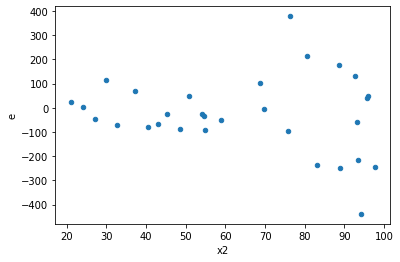

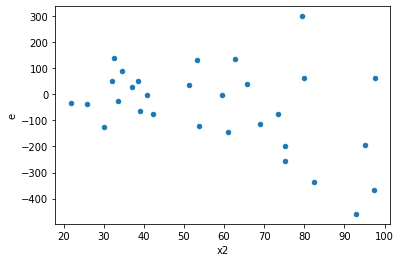

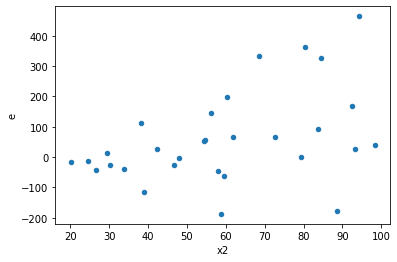

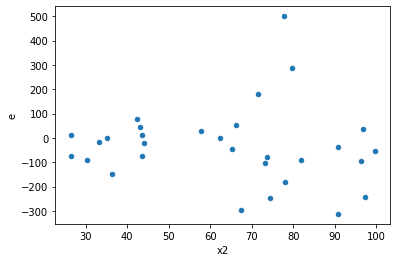

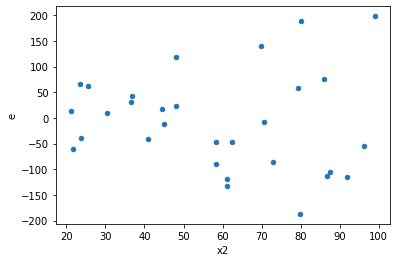

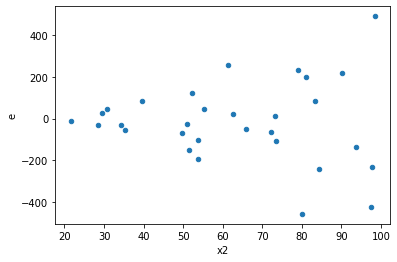

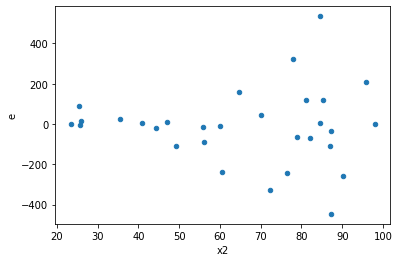

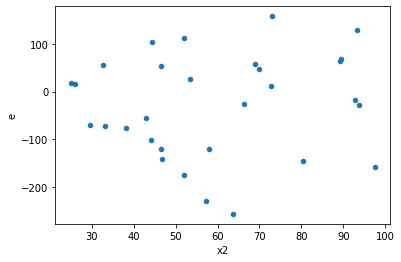

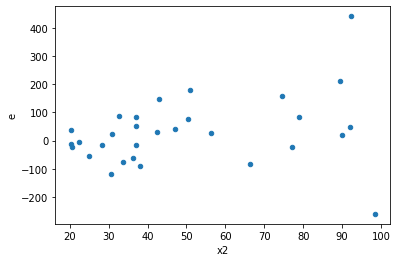

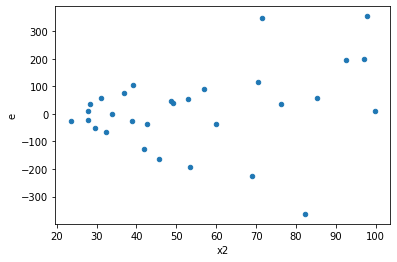

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,10.0,16.0,37937.35884944908,694732.5808596868,3793.7358849449083,43420.78630373043,11.445389879680823,3.1981741750453097e-05,0.9999840091291248,1.5990870875226548e-05,Reject001=0 : Heteroscedasticity
6.0,10.0,16.0,19002.373375918964,957406.0139386391,1900.2373375918964,59837.87587116494,31.489685360564152,2.482004179960029e-08,0.9999999875899791,1.2410020899800145e-08,Reject001=0 : Heteroscedasticity
7.0,12.0,14.0,67378.06873269624,124956.98104260575,5614.83906105802,8925.49864590041,1.5896267994222,0.4049169429088626,0.7975415285455687,0.2024584714544313,Reject001=1 : Homoscedasticity
8.0,19.0,7.0,88697.70569317718,276628.378403421,4668.300299640904,39518.339771917286,8.465252283568203,0.007743013130226961,0.9961284934348865,0.0038715065651134806,Reject001=0 : Heteroscedasticity
9.0,15.0,11.0,79106.77408431725,470166.4173083402,5273.784938954484,42742.40157348547,8.104691804508635,0.0012583981359965968,0.9993708009320017,0.0006291990679982984,Reject001=0 : Heteroscedasticity
11.0,11.0,15.0,245994.48789797918,340490.3825945455,22363.135263452652,22699.358839636367,1.0150347244347797,0.9560007254131841,0.5219996372934079,0.4780003627065921,Reject001=1 : Homoscedasticity
14.0,5.0,21.0,4355.696701200255,647494.3151865118,871.1393402400511,30833.062627929135,35.393950432123496,3.0540188156180648e-09,0.9999999984729906,1.5270094078090324e-09,Reject001=0 : Heteroscedasticity
15.0,18.0,8.0,201766.2308127626,206557.0410452616,11209.235045153478,25819.6301306577,2.303424812366772,0.22979487057092052,0.8851025647145397,0.11489743528546026,Reject001=1 : Homoscedasticity
16.0,12.0,14.0,166676.90267832114,375958.6031190402,13889.741889860095,26854.1859370743,1.9333826467055242,0.23947891113733144,0.8802605444313343,0.11973945556866572,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,15.0,429302.0667583321,200359.99105702707,39027.46061439382,13357.332737135139,0.3422547233885052,0.07876149394131403,Reject001=1 : Homoscedasticity
1.0,13.0,13.0,350393.9521118194,129205.92450119801,26953.380931678417,9938.917269322923,0.3687447335277213,0.08357035284958282,Reject001=1 : Homoscedasticity
2.0,11.0,15.0,332566.48691574775,95625.9354799893,30233.316992340704,6375.06236533262,0.2108621547198303,0.012923891669839616,Reject001=1 : Homoscedasticity
3.0,10.0,16.0,37937.35884944908,694732.5808596868,3793.7358849449083,43420.78630373043,11.445389879680823,3.1981741750453097e-05,Reject001=0 : Heteroscedasticity
4.0,16.0,10.0,153732.11117348738,27989.18336613984,9608.256948342962,2798.918336613984,0.29130344365912125,0.027695028903922527,Reject001=1 : Homoscedasticity
5.0,11.0,15.0,859200.8510135146,176577.12296860217,78109.16827395587,11771.808197906812,0.15070968566223888,0.003103541717164706,Reject001=0 : Heteroscedasticity
6.0,10.0,16.0,19002.373375918964,957406.0139386391,1900.2373375918964,59837.87587116494,31.489685360564152,2.482004179960029e-08,Reject001=0 : Heteroscedasticity
7.0,12.0,14.0,67378.06873269624,124956.98104260575,5614.83906105802,8925.49864590041,1.5896267994222,0.4049169429088626,Reject001=1 : Homoscedasticity
8.0,19.0,7.0,88697.70569317718,276628.378403421,4668.300299640904,39518.339771917286,8.465252283568203,0.007743013130226961,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      683
Reject001=0 : Heteroscedasticity    317
Name: Result_test, dtype: int64